In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
df = pd.read_csv('FlightDelays.csv',nrows=5000000)

C:\Users\TAMU Libraries\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
df=df.rename(columns={"DEST": "DESTINATION", "CRS_DEP_TIME": "SCHEDULED_DEPARTURE", "CRS_ARR_TIME":"SCHEDULED_ARRIVAL","DEP_TIME":"ACTUAL_DEPARTURE","ARR_TIME":"ACTUAL_ARRIVAL","DEP_DELAY_NEW":"DEPARTURE_DELAY","ARR_DELAY_NEW":"ARRIVAL_DELAY"})

In [82]:
df1 = df[['FL_DATE', 'DAY_OF_WEEK','CARRIER','FL_NUM','ORIGIN','DESTINATION','Route','SCHEDULED_DEPARTURE','ACTUAL_DEPARTURE','SCHEDULED_ARRIVAL','ACTUAL_ARRIVAL','DISTANCE','PASSENGERS','DEPARTURE_DELAY','ARRIVAL_DELAY','ARR_DEL15','TAXI_IN','TAXI_OUT']]

In [83]:
#dropping the columns which are object
df1 = df1.drop(['SCHEDULED_DEPARTURE','ACTUAL_DEPARTURE','SCHEDULED_ARRIVAL','ACTUAL_ARRIVAL'],axis=1)

In [84]:
df1 = df1[['ARR_DEL15', 'DAY_OF_WEEK','CARRIER','FL_NUM','ORIGIN','DESTINATION','Route','DISTANCE','PASSENGERS','TAXI_IN','TAXI_OUT']]

In [85]:
df1.columns

Index(['ARR_DEL15', 'DAY_OF_WEEK', 'CARRIER', 'FL_NUM', 'ORIGIN',
       'DESTINATION', 'Route', 'DISTANCE', 'PASSENGERS', 'TAXI_IN',
       'TAXI_OUT'],
      dtype='object')

In [86]:
#dropping rows with missing values
df1 = df1.dropna(subset =['ARR_DEL15'])

df1.isna().sum()

ARR_DEL15         0
DAY_OF_WEEK       0
CARRIER           0
FL_NUM            0
ORIGIN            0
DESTINATION       0
Route             0
DISTANCE          0
PASSENGERS     6394
TAXI_IN           0
TAXI_OUT          0
dtype: int64

In [87]:
#dropping rows with missing values
df1 = df1.dropna(subset =['PASSENGERS'])
df1.isna().sum()

ARR_DEL15      0
DAY_OF_WEEK    0
CARRIER        0
FL_NUM         0
ORIGIN         0
DESTINATION    0
Route          0
DISTANCE       0
PASSENGERS     0
TAXI_IN        0
TAXI_OUT       0
dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df1.iloc[:,2] = labelencoder.fit_transform(df1.iloc[:,2].values)

In [89]:
print(df1['CARRIER'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [90]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df1.iloc[:,4] = labelencoder.fit_transform(df1.iloc[:,4].values)
df1.iloc[:,5] = labelencoder.fit_transform(df1.iloc[:,5].values)

In [91]:
#Split the data into independent X and dependent Y values
X = df1.iloc[:,1:12].values
Y = df1.iloc[:,0].values

#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

#Scale the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [92]:
df1.dtypes

ARR_DEL15      float64
DAY_OF_WEEK      int64
CARRIER          int32
FL_NUM           int64
ORIGIN           int32
DESTINATION      int32
Route            int64
DISTANCE         int64
PASSENGERS     float64
TAXI_IN        float64
TAXI_OUT       float64
dtype: object

In [93]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
     #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  return tree,forest

In [94]:
#Get and train all of the models
model = models(X_train,Y_train)

[5]Decision Tree Classifier Training Accuracy: 0.9972475193258329
[6]Random Forest Classifier Training Accuracy: 0.9757297067560261


In [95]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #extracting true_positives, false_positives, true_negatives, false_negatives
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  print(cm)
  print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[649047 135645]
 [123682  68654]]
Model[0] Testing Accuracy = "0.7345756723451119 !"

[[750541  34151]
 [149105  43231]]
Model[1] Testing Accuracy = "0.8124352628583827 !"



In [96]:

#Get the importance of the features
forest = model[1]
importances = pd.DataFrame({'feature':df1.iloc[:, 1:12].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
TAXI_OUT,0.204
PASSENGERS,0.177
FL_NUM,0.172
TAXI_IN,0.144
DAY_OF_WEEK,0.090
Route,0.059
DISTANCE,0.058
DESTINATION,0.046
ORIGIN,0.032


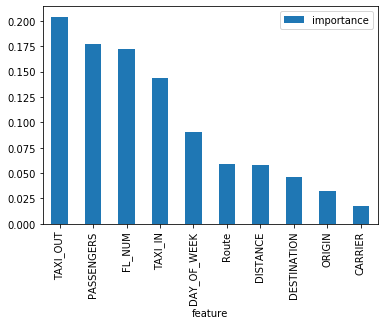

In [97]:

#Visualize the importance
importances.plot.bar()

In [41]:

#Print Prediction of Random Forest Classifier model
pred = model[1].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.